In [27]:
from dotenv import load_dotenv
import os
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

In [3]:
load_dotenv(dotenv_path=r"C:\dev\lol_data_project\variables.env")

DB_HOST = os.getenv("DB_HOST")
DB_NAME = os.environ.get("DB_NAME")
DB_USER = os.environ.get("DB_USER")
DB_PASSWORD = os.environ.get("DB_PASSWORD")

conn = mysql.connector.connect(
            host=DB_HOST,
            user=DB_USER,
            password=DB_PASSWORD,
            database=DB_NAME
        )

cursor = conn.cursor()

query = "SELECT * FROM BasicStats"

cursor.execute(query)

data = results = cursor.fetchall()

cursor.close()
conn.close()

print(type(data))

<class 'list'>


In [ ]:
#print(data[0][146])
gameID = []
creationTime = []
for i in range(0,len(data)):
    gameID.append(data[i][145])
    creationTime.append(data[i][146])


NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102
NA1_5223674229
1738866682102


In [25]:
ids = [int(s[4:]) for s in gameID]
print(ids[0])

5223674229


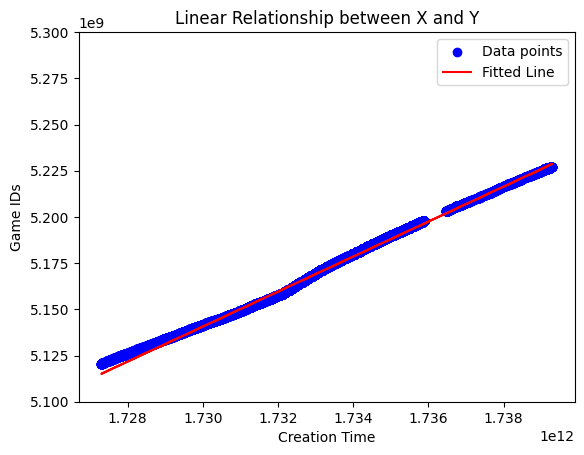

In [31]:
x = np.array(creationTime)
y = np.array(ids)

slope, intercept = np.polyfit(x, y, 1)
y_fit = slope * x + intercept
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_fit, color='red', label='Fitted Line')
plt.xlabel('Creation Time')
plt.ylabel('Game IDs')
plt.title('Linear Relationship between X and Y')
plt.legend()
plt.ylim(5100000000, 5300000000)
plt.show()

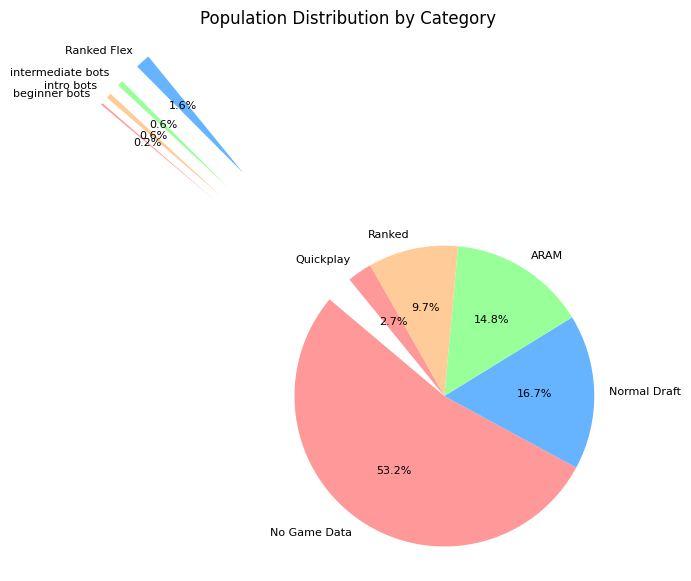

In [41]:
categories = ['No Game Data', 'Normal Draft', 'ARAM','Ranked', 'Quickplay', 'Ranked Flex', 'intermediate bots', 'intro bots', 'beginner bots']
values = [101140, 31639, 28074, 18435, 5069, 3030, 1180, 1082, 371]
explode = [0,0,0,0,0,2,2,2,2]
plt.figure(figsize=(7, 7))  # Optional: Sets the figure size (optional)
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],explode=explode,textprops={'fontsize': 8})

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Population Distribution by Category')

# Show the pie chart
plt.show()